In [1]:
using DifferentialEquations, Plots

In [4]:
α = 1
β = 1
u₀ = 1/2
f(u, p, t) = α * u
g(u, p, t) = β * u
dt = 1//2^(4)
tspan = (0., 1.)
prob = SDEProblem(f, g, u₀, (0., 1.));
sol = solve(prob, EM(), dt=dt);

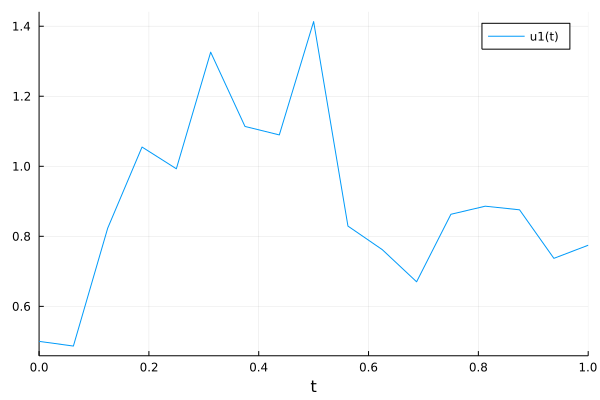

In [5]:
plot(sol)

In [7]:
f_analytic(u₀,p,t,W) = u₀*exp((α-(β^2)/2)*t+β*W)
ff = SDEFunction(f,g,analytic=f_analytic)
prob = SDEProblem(ff,g,u₀,(0.0,1.0));
sol = solve(prob,EM(),dt=dt);

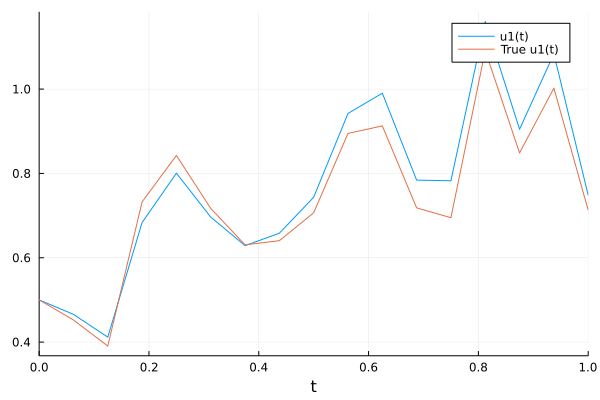

In [8]:
plot(sol,plot_analytic=true)

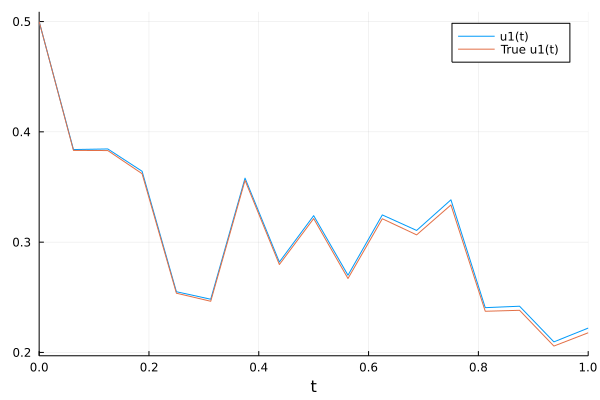

In [10]:
sol = solve(prob,SRIW1(),dt=dt,adaptive=false)
plot(sol,plot_analytic=true)

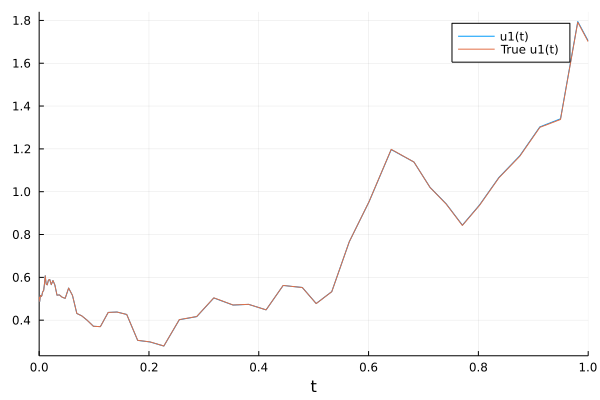

In [11]:
sol = solve(prob,SRIW1())
plot(sol,plot_analytic=true)

In [13]:
ensembleprob = EnsembleProblem(prob);
sol = solve(ensembleprob,EnsembleThreads(),trajectories=1000);

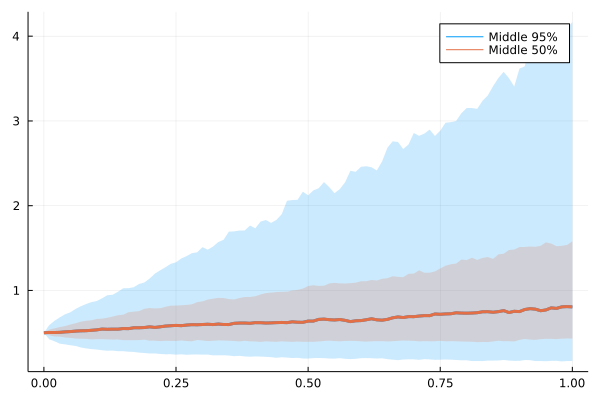

In [14]:
using DifferentialEquations.EnsembleAnalysis
summ = EnsembleSummary(sol,0:0.01:1)
plot(summ,labels="Middle 95%")
summ = EnsembleSummary(sol,0:0.01:1;quantiles=[0.25,0.75])
plot!(summ,labels="Middle 50%",legend=true)

In [18]:
function lorenz(du, u, p, t)
    du[1] = 10.0(u[2] - u[1])
    du[2] = u[1] * (28. - u[3]) - u[2]
    du[3] = u[1] * u[2] - (8/3) * u[3]
end

function σ_lorenz(du, u, p, t)
    du[1] = 3.
    du[2] = 3.
    du[3] = 3.
end

σ_lorenz (generic function with 1 method)

In [19]:
prob_sde_lorenz = SDEProblem(lorenz, σ_lorenz, [1. ,0., 0.], (0., 10.))
sol = solve(prob_sde_lorenz);

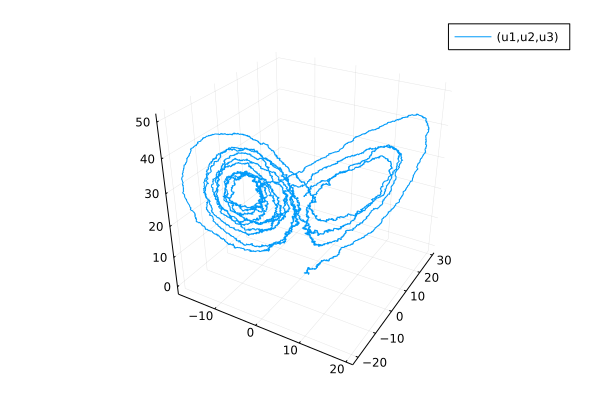

In [21]:
plot(sol, vars=(1, 2, 3))

In [25]:
function σ_lorenz_2(du,u,p,t)
  du[1] = 3.0
  du[2] = u[2]*u[1]*3.0
  du[3] = 3.0
end

σ_lorenz_2 (generic function with 1 method)

In [28]:
f(du, u, p, t) = (du .= u)
g(du, u, p, t) = (du .= u)
u0 = rand(4, 2)

W = WienerProcess(0., 0., 0.)
prob = SDEProblem(f, g, u0, (0., 1.), noise=W)
sol = solve(prob, SRIW1());

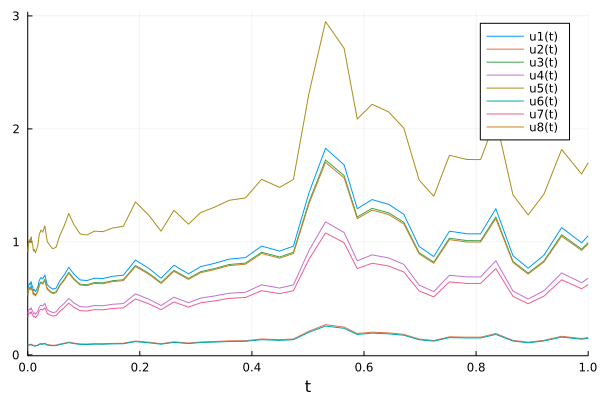

In [29]:
plot(sol)

In [31]:
f(du,u,p,t) = du .= 1.01u
function g(du,u,p,t)
  du[1,1] = 0.3u[1]
  du[1,2] = 0.6u[1]
  du[1,3] = 0.9u[1]
  du[1,4] = 0.12u[1]
  du[2,1] = 1.2u[2]
  du[2,2] = 0.2u[2]
  du[2,3] = 0.3u[2]
  du[2,4] = 1.8u[2]
end
prob = SDEProblem(f,g,ones(2),(0.0,1.0),noise_rate_prototype=zeros(2,4));

┌ Warning: dt(2.220446049250313e-16) <= dtmin(2.220446049250313e-16) at t=0.04506731130353145. Aborting. There is either an error in your model specification or the true solution is unstable.
└ @ SciMLBase /home/eric/.julia/packages/SciMLBase/TqBga/src/integrator_interface.jl:427


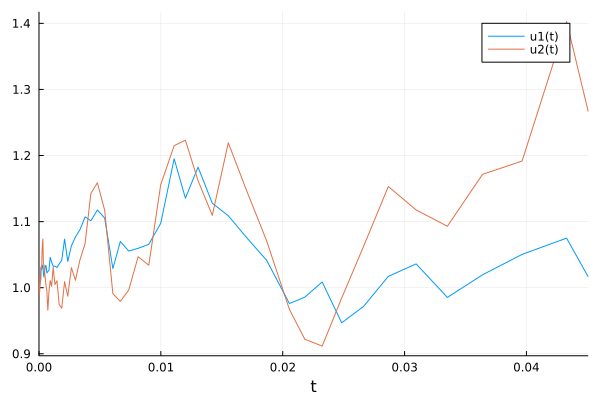

In [32]:
sol = solve(prob)
plot(sol)

In [34]:
using SparseArrays

In [35]:
# Define a sparse matrix by making a dense matrix and setting some values as not zero
A = zeros(2,4)
A[1,1] = 1
A[1,4] = 1
A[2,4] = 1
A=sparse(A)

# Make `g` write the sparse matrix values
function g(du,u,p,t)
  du[1,1] = 0.3u[1]
  du[1,4] = 0.12u[2]
  du[2,4] = 1.8u[2]
end

# Make `g` use the sparse matrix
prob = SDEProblem(f,g,ones(2),(0.0,1.0),noise_rate_prototype=A)

SDEProblem with uType Vector{Float64} and tType Float64. In-place: true
timespan: (0.0, 1.0)
u0: 2-element Vector{Float64}:
 1.0
 1.0

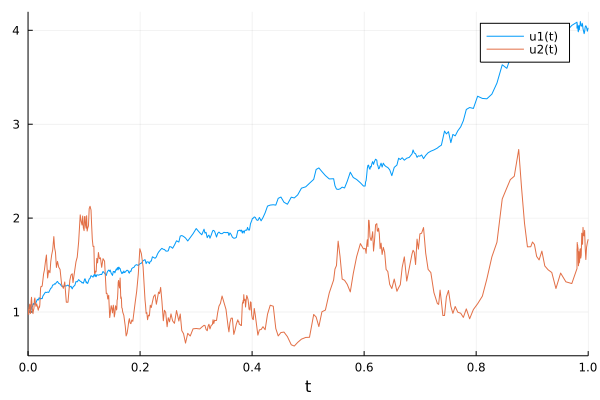

In [36]:
sol = solve(prob)
plot(sol)